In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/curlew-sound-3.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/cricket-sounds-for-sleep-48.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/sparrow-sound-effect-39.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/crow-cawing-sound-effect-9.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/cricket-sounds-for-sleep-5.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/rain-thunder-and-crickets-sound-effect-4.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/crickets-chirping-crickets-sound-0.wav
/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/cricket-sounds-for-sleep-29.wav
/kaggle/input/z

In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import tensorflow_io as tfio
import IPython.display as ipd

In [52]:
INPUT_FOLDER = '/kaggle/input'
MAIN_FOLDER = os.path.join(INPUT_FOLDER,'z-by-hp-unlocked-challenge-3-signal-processing')
NOT_CAPUCHIN_BIRDS = os.path.join(MAIN_FOLDER, 'Parsed_Not_Capuchinbird_Clips')
CAPUCHIN_BIRDS = os.path.join(MAIN_FOLDER, 'Parsed_Capuchinbird_Clips')


CAPUCHIN_FILE = os.path.join(CAPUCHIN_BIRDS, 'XC16803-2.wav')
NOT_CAPUCHIN_FILE = os.path.join(NOT_CAPUCHIN_BIRDS, 'Crickets-chirping-at-night-0.wav')

In [53]:
ipd.Audio(CAPUCHIN_FILE)

In [54]:
def load_wave(filename):
    filename = tf.strings.strip(filename)  # Ensure it's a valid string tensor
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav


In [55]:
wave = load_wave(CAPUCHIN_FILE)
nwave = load_wave(NOT_CAPUCHIN_FILE)

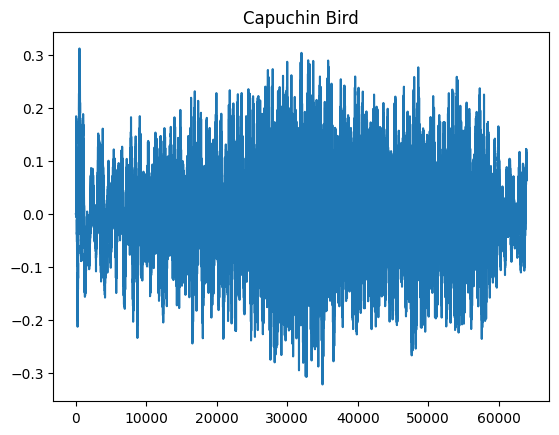

In [56]:
plt.plot(wave)
plt.title("Capuchin Bird")
plt.show()

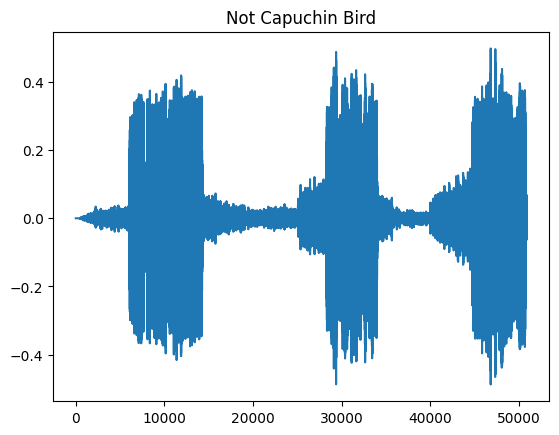

In [57]:
plt.plot(nwave)
plt.title("Not Capuchin Bird")
plt.show()

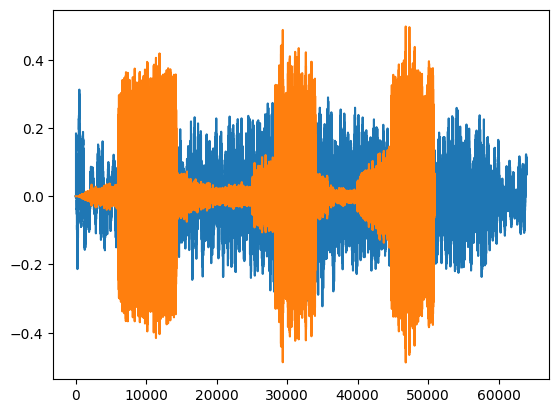

In [58]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [59]:
POS = CAPUCHIN_BIRDS
NEG = NOT_CAPUCHIN_BIRDS

In [60]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [61]:
pos

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [62]:
positives = tf.data.Dataset.zip((pos,tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)
# ("pos1.wav", 1)
# ("pos2.wav", 1)


In [63]:
data.shuffle(1000).as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC46077-0.wav',
 1.0)

In [64]:
lengths = []
for file in os.listdir(POS):
    tensor_wave = load_wave(os.path.join(POS,file))
    lengths.append(len(tensor_wave))

In [65]:
lengths

[64000,
 48000,
 48000,
 56000,
 56000,
 64000,
 48000,
 56000,
 64000,
 56000,
 55999,
 72000,
 48000,
 56000,
 56000,
 40000,
 40000,
 56000,
 56000,
 64000,
 32000,
 56000,
 64000,
 40000,
 48000,
 64000,
 56000,
 40000,
 64000,
 48000,
 56000,
 64000,
 56000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 72000,
 48000,
 48000,
 64000,
 39999,
 64000,
 56000,
 64000,
 56000,
 40000,
 64000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,
 72000,
 40000,
 48000,
 40000,
 48000,
 64000,
 48000,
 64000,
 56000,
 48000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 48000,
 40000,
 48000,
 64000,
 56000,
 40000,
 56000,
 32000,
 56000,
 48000,
 64000,
 64000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 64000,
 56000,
 48000,
 48000,
 64000,
 40000,
 56000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 72000,
 56000,
 56000,
 48000,
 40000,
 48000,
 64000,
 56000,
 64000,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,


In [66]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [67]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [68]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [69]:
# preprocessing to convert into spectrogram
def preprocess(file_path, label):  
    wav = load_wave(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [70]:
filepath,label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [71]:
filepath

b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC46241-3.wav'

In [72]:
spectrogram,label = preprocess(filepath,label)

In [73]:
spectrogram,label

(<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
 array([[[4.6382463e-01],
         [3.5759300e-01],
         [1.5134776e-01],
         ...,
         [1.7011162e-06],
         [1.7776817e-06],
         [1.2964010e-06]],
 
        [[4.3619451e-01],
         [3.2718349e-01],
         [1.1619123e-01],
         ...,
         [2.3797024e-06],
         [3.4353418e-06],
         [8.0466270e-07]],
 
        [[4.1990292e-01],
         [3.1389174e-01],
         [1.0571300e-01],
         ...,
         [7.1452246e-06],
         [1.1493472e-06],
         [2.7418137e-06]],
 
        ...,
 
        [[4.0302658e+00],
         [3.1258945e+00],
         [1.3028072e+00],
         ...,
         [1.4283368e-06],
         [1.3328004e-06],
         [0.0000000e+00]],
 
        [[4.0875483e+00],
         [3.1743710e+00],
         [1.3497064e+00],
         ...,
         [1.6571806e-06],
         [6.6640018e-07],
         [7.1525574e-07]],
 
        [[4.0893850e+00],
         [3.1946054e+00],
         [1

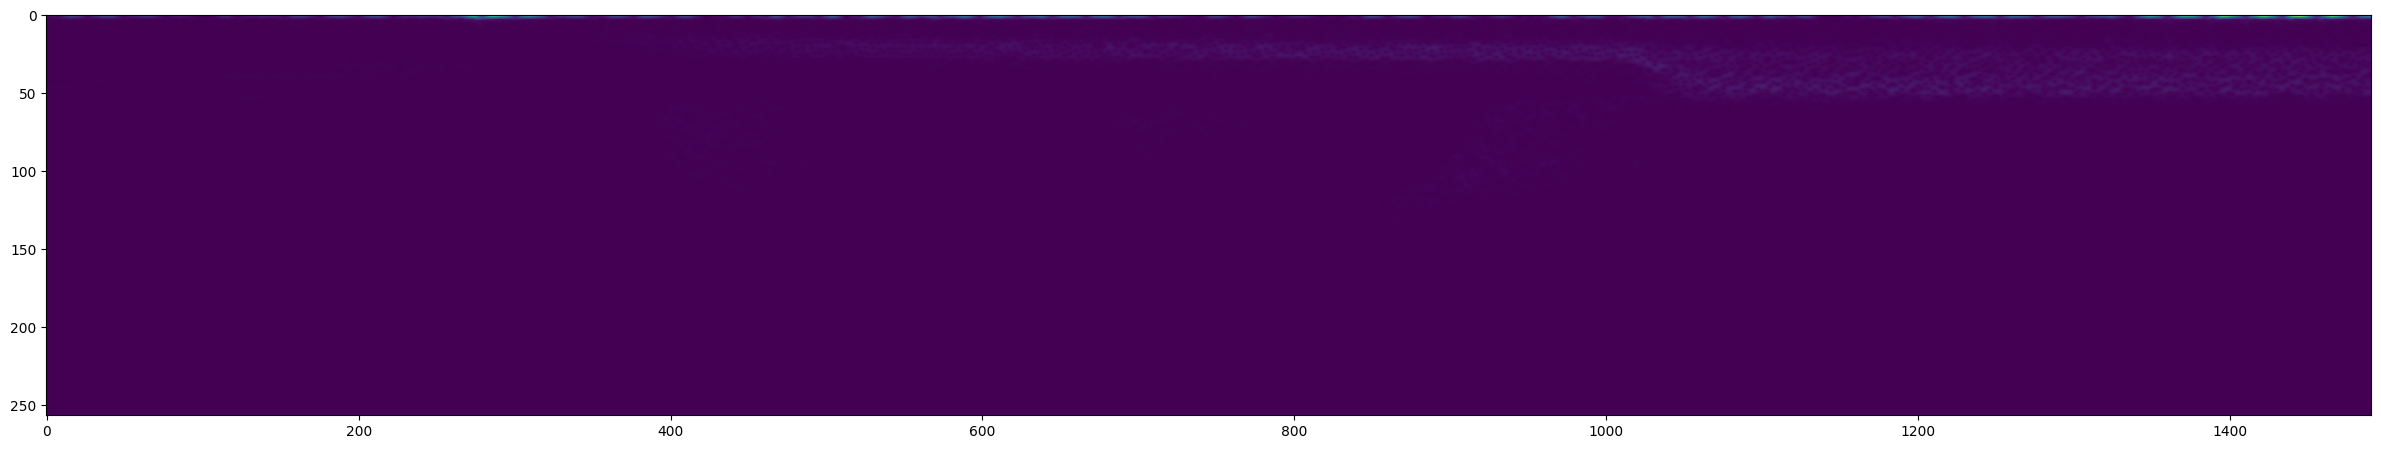

In [74]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [75]:
filepath,label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [76]:
spectrogram,label = preprocess(filepath,label)

In [77]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[2.1336854e-01],
        [2.4817909e-01],
        [2.2609411e-01],
        ...,
        [1.8471433e-04],
        [7.3174531e-05],
        [4.4561923e-05]],

       [[3.9349681e-01],
        [3.7380016e-01],
        [3.0906808e-01],
        ...,
        [1.7391703e-04],
        [9.1610294e-05],
        [4.1067600e-05]],

       [[5.3747237e-01],
        [4.9075752e-01],
        [3.5578269e-01],
        ...,
        [1.8270803e-04],
        [7.1664392e-05],
        [5.0961971e-06]],

       ...,

       [[5.3687394e-02],
        [9.4004475e-02],
        [1.3597362e-01],
        ...,
        [2.1585752e-04],
        [6.1646591e-05],
        [8.5663050e-06]],

       [[1.0475847e-01],
        [8.7675206e-02],
        [6.2965304e-02],
        ...,
        [1.8962867e-04],
        [6.9493159e-05],
        [2.1811575e-05]],

       [[1.2808515e-01],
        [7.9951592e-02],
        [2.8728178e-02],
        ...,
        [1.8081399

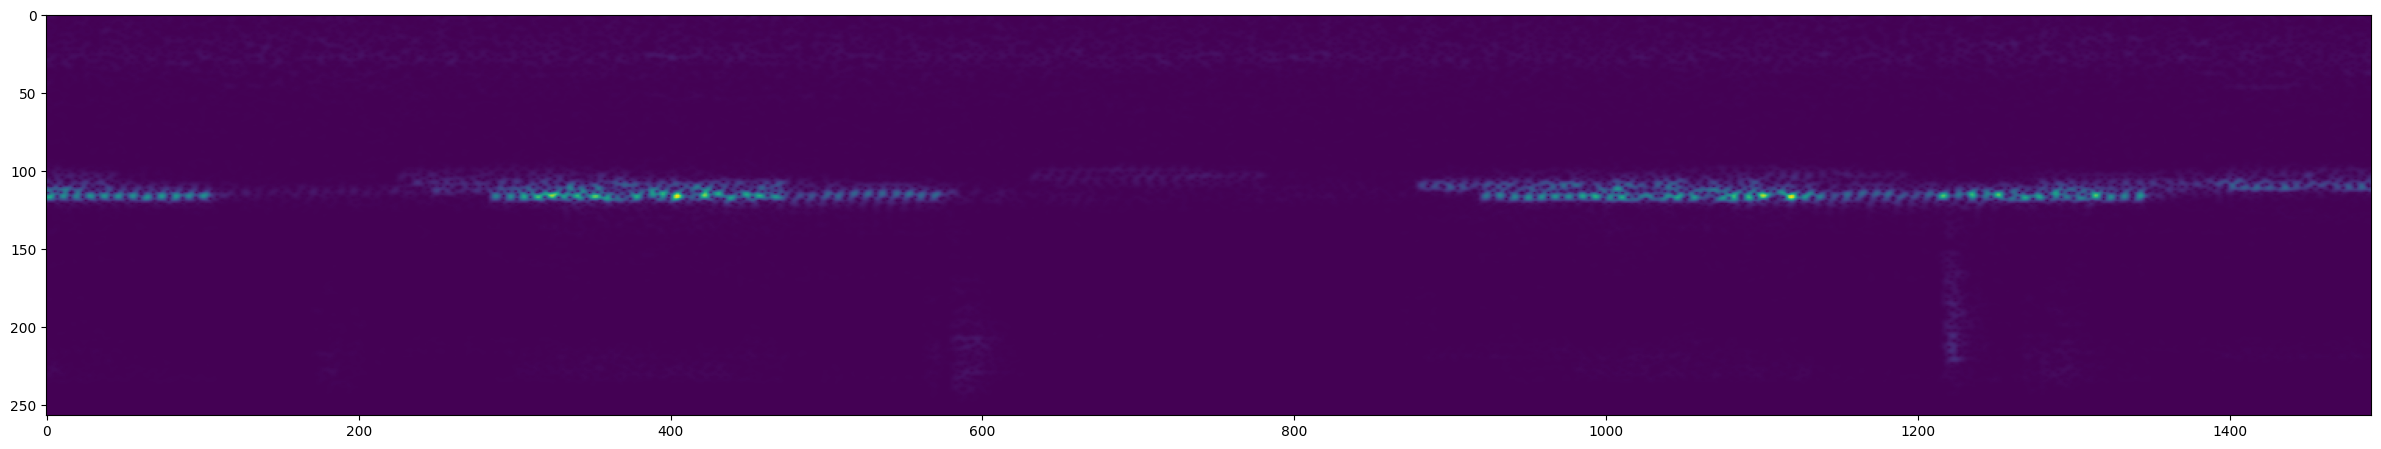

In [78]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [79]:
# creating a tensorflow pipeline
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16) 
data = data.prefetch(8)

In [80]:
len(data)

51

In [81]:
# creating training and testing dataset
train = data.take(36)
test = data.skip(36).take(15)

In [82]:
for data, label in train.take(1):
    print(data.shape, label.shape)

(16, 1491, 257, 1) (16,)


In [83]:
import tensorflow as tf
import tf_keras as keras
from tf_keras.models import Sequential
from tf_keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Input

In [84]:
model = Sequential()
model.add(Input(shape=(1491, 257, 1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [85]:
model.compile('Adam',loss='BinaryCrossentropy',metrics=[keras.metrics.Recall(),keras.metrics.Precision()])

In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1489, 255, 16)     160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 744, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 742, 125, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 371, 62, 16)       0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 368032)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [87]:
print(model.input_shape)


(None, 1491, 257, 1)


In [88]:
# Then fit the model
hist = model.fit(train, epochs=4, validation_data=test)

Epoch 1/4
36/36 [==============================] - 11s 95ms/step - loss: 1.8609 - recall_1: 0.8684 - precision_1: 0.7811 - val_loss: 0.1729 - val_recall_1: 0.8000 - val_precision_1: 0.9836
Epoch 2/4
36/36 [==============================] - 3s 77ms/step - loss: 0.0404 - recall_1: 0.9880 - precision_1: 0.9647 - val_loss: 0.0271 - val_recall_1: 0.9672 - val_precision_1: 1.0000
Epoch 3/4
36/36 [==============================] - 3s 78ms/step - loss: 0.0149 - recall_1: 0.9934 - precision_1: 0.9869 - val_loss: 0.0274 - val_recall_1: 0.9474 - val_precision_1: 1.0000
Epoch 4/4
36/36 [==============================] - 3s 77ms/step - loss: 0.0195 - recall_1: 0.9811 - precision_1: 0.9873 - val_loss: 0.0053 - val_recall_1: 1.0000 - val_precision_1: 1.0000


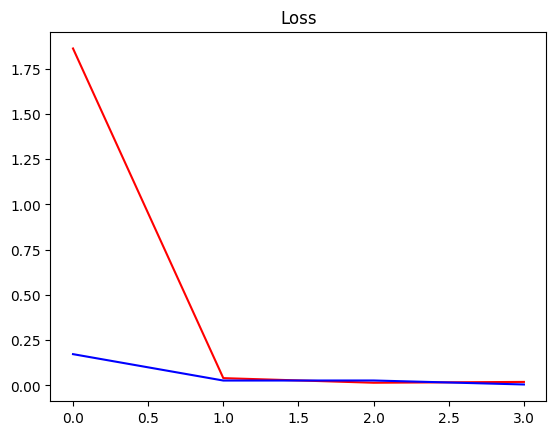

In [89]:
plt.title('Loss')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'b')
plt.show()

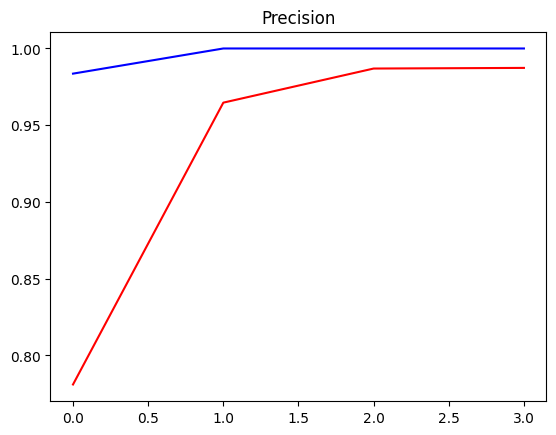

In [91]:
plt.title('Precision')
plt.plot(hist.history['precision_1'],'r')
plt.plot(hist.history['val_precision_1'],'b')
plt.show()

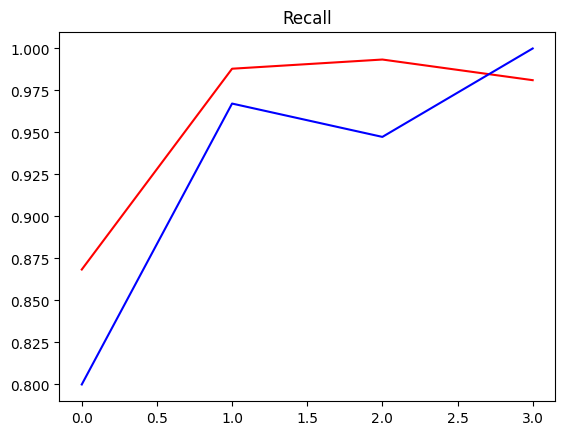

In [92]:
plt.title('Recall')
plt.plot(hist.history['recall_1'],'r')
plt.plot(hist.history['val_recall_1'],'b')
plt.show()

In [93]:
hist.history

{'loss': [1.8608918190002441,
  0.04037269577383995,
  0.014935199171304703,
  0.019511858001351357],
 'recall_1': [0.8684210777282715,
  0.9879518151283264,
  0.9934210777282715,
  0.9811320900917053],
 'precision_1': [0.7810651063919067,
  0.9647058844566345,
  0.9869281053543091,
  0.9873417615890503],
 'val_loss': [0.1728639304637909,
  0.027061687782406807,
  0.027387697249650955,
  0.005338800139725208],
 'val_recall_1': [0.800000011920929,
  0.9672130942344666,
  0.9473684430122375,
  1.0],
 'val_precision_1': [0.9836065769195557, 1.0, 1.0, 1.0]}

In [94]:
# making prediction on single clip
X_test,y_test = test.as_numpy_iterator().next()

In [95]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 122ms/step


In [96]:
yhat

array([[7.8118273e-06],
       [2.1362274e-14],
       [2.3598613e-18],
       [2.5842053e-28],
       [1.0000000e+00],
       [9.9999201e-01],
       [1.0000000e+00],
       [4.5397495e-09],
       [1.0000000e+00],
       [5.7255834e-17],
       [2.9186655e-12],
       [5.8111990e-18],
       [3.8496566e-08],
       [4.3633700e-13],
       [6.8521312e-13],
       [4.1213350e-20]], dtype=float32)

In [97]:
# converting the probabilities into classes
yhat = [1 if prediction>0.5 else 0 for prediction in yhat]

In [98]:
yhat

[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [99]:
y_test

array([0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [102]:
# loading up MP3
def load_mp3(filename):
    res = tfio.audio.AudioIOTensor(filename)
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [105]:
forest_recordings = os.path.join(MAIN_FOLDER,'Forest Recordings')
mp3 = os.path.join(forest_recordings,'recording_00.mp3')

In [106]:
wav = load_mp3(mp3)

In [107]:
 audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav,wav,sequence_length=48000,sequence_stride=48000,batch_size=1)

In [108]:
samples,index = audio_slices.as_numpy_iterator().next()

In [109]:
samples.shape

(1, 48000)

In [112]:
# function to convert clips into windowed spectrograms
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    spectrogram.set_shape([1491, 257, 1])
    return spectrogram

In [113]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(32)

In [114]:
audio_slices

<_BatchDataset element_spec=TensorSpec(shape=(None, 1491, 257, 1), dtype=tf.float32, name=None)>

In [118]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction>0.99 else 0 for prediction in yhat]

2/2 [==============================] - 0s 69ms/step


In [119]:
len(yhat)

60

In [120]:
# group the consecutive detections
from itertools import groupby

In [121]:
yhat = [key for key,group in groupby(yhat)]

In [122]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [125]:
results = {}
for file in os.listdir(forest_recordings):
    FILEPATH = os.path.join(forest_recordings, file)
    wav = load_mp3(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(32)

    yhat = model.predict(audio_slices)
    
    results[file] = yhat

2/2 [==============================] - 0s 60ms/step


In [127]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]

In [128]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed  

{'recording_76.mp3': 0,
 'recording_62.mp3': 0,
 'recording_48.mp3': 4,
 'recording_44.mp3': 1,
 'recording_45.mp3': 3,
 'recording_06.mp3': 5,
 'recording_43.mp3': 5,
 'recording_68.mp3': 1,
 'recording_95.mp3': 3,
 'recording_17.mp3': 3,
 'recording_65.mp3': 4,
 'recording_74.mp3': 0,
 'recording_10.mp3': 5,
 'recording_49.mp3': 0,
 'recording_15.mp3': 2,
 'recording_37.mp3': 3,
 'recording_64.mp3': 1,
 'recording_39.mp3': 14,
 'recording_04.mp3': 4,
 'recording_28.mp3': 13,
 'recording_05.mp3': 0,
 'recording_80.mp3': 1,
 'recording_57.mp3': 3,
 'recording_12.mp3': 0,
 'recording_59.mp3': 13,
 'recording_67.mp3': 0,
 'recording_09.mp3': 0,
 'recording_79.mp3': 0,
 'recording_14.mp3': 0,
 'recording_63.mp3': 15,
 'recording_86.mp3': 17,
 'recording_47.mp3': 15,
 'recording_03.mp3': 0,
 'recording_33.mp3': 0,
 'recording_08.mp3': 25,
 'recording_51.mp3': 3,
 'recording_35.mp3': 0,
 'recording_81.mp3': 4,
 'recording_30.mp3': 1,
 'recording_88.mp3': 0,
 'recording_75.mp3': 1,
 'recordi

In [129]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed    

{'recording_76.mp3': 0,
 'recording_62.mp3': 0,
 'recording_48.mp3': 4,
 'recording_44.mp3': 1,
 'recording_45.mp3': 3,
 'recording_06.mp3': 5,
 'recording_43.mp3': 5,
 'recording_68.mp3': 1,
 'recording_95.mp3': 3,
 'recording_17.mp3': 3,
 'recording_65.mp3': 4,
 'recording_74.mp3': 0,
 'recording_10.mp3': 5,
 'recording_49.mp3': 0,
 'recording_15.mp3': 2,
 'recording_37.mp3': 3,
 'recording_64.mp3': 1,
 'recording_39.mp3': 14,
 'recording_04.mp3': 4,
 'recording_28.mp3': 13,
 'recording_05.mp3': 0,
 'recording_80.mp3': 1,
 'recording_57.mp3': 3,
 'recording_12.mp3': 0,
 'recording_59.mp3': 13,
 'recording_67.mp3': 0,
 'recording_09.mp3': 0,
 'recording_79.mp3': 0,
 'recording_14.mp3': 0,
 'recording_63.mp3': 15,
 'recording_86.mp3': 17,
 'recording_47.mp3': 15,
 'recording_03.mp3': 0,
 'recording_33.mp3': 0,
 'recording_08.mp3': 25,
 'recording_51.mp3': 3,
 'recording_35.mp3': 0,
 'recording_81.mp3': 4,
 'recording_30.mp3': 1,
 'recording_88.mp3': 0,
 'recording_75.mp3': 1,
 'recordi

In [130]:
import csv

In [131]:
with open('/kaggle/working/results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])